### This dataset has been taken from: https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
import os
from collections import Counter
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [421]:
cd /media/thedrowsywinger/2A24A59224A56195/Poralekha/github/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports

/media/thedrowsywinger/2A24A59224A56195/Poralekha/github/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports


In [422]:
ls

01-22-2020.csv*  02-07-2020.csv*  02-23-2020.csv*  03-10-2020.csv*
01-23-2020.csv*  02-08-2020.csv*  02-24-2020.csv*  03-11-2020.csv*
01-24-2020.csv*  02-09-2020.csv*  02-25-2020.csv*  03-12-2020.csv*
01-25-2020.csv*  02-10-2020.csv*  02-26-2020.csv*  03-13-2020.csv*
01-26-2020.csv*  02-11-2020.csv*  02-27-2020.csv*  03-14-2020.csv*
01-27-2020.csv*  02-12-2020.csv*  02-28-2020.csv*  03-15-2020.csv*
01-28-2020.csv*  02-13-2020.csv*  02-29-2020.csv*  03-16-2020.csv*
01-29-2020.csv*  02-14-2020.csv*  03-01-2020.csv*  03-17-2020.csv*
01-30-2020.csv*  02-15-2020.csv*  03-02-2020.csv*  03-18-2020.csv*
01-31-2020.csv*  02-16-2020.csv*  03-03-2020.csv*  03-19-2020.csv*
02-01-2020.csv*  02-17-2020.csv*  03-04-2020.csv*  03-20-2020.csv*
02-02-2020.csv*  02-18-2020.csv*  03-05-2020.csv*  03-21-2020.csv*
02-03-2020.csv*  02-19-2020.csv*  03-06-2020.csv*  03-22-2020.csv*
02-04-2020.csv*  02-20-2020.csv*  03-07-2020.csv*  03-23-2020.csv*
02-05-2020.csv*  02-21-2020.csv*  03-08-2020.csv*  README.md*


What each CSV file looks like:

In [30]:
old_sample_file = pd.read_csv("./01-22-2020.csv")
old_sample_file.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN


In [291]:
sample_file = pd.read_csv("./01-23-2020.csv")

In [294]:
confi = list(sample_file['Confirmed'])

In [297]:
all(isinstance(n, float) for n in confi)

True

In [303]:
import math


In [305]:
len(another)

46

Combining all of the csv files

In [323]:
list_of_all_files = os.listdir()

actual_list = []
for i in list_of_all_files:
    if "csv" in i:
        actual_list.append(i)
        
province_list = []
country_list = []
confirmed = []
death_count = []
date_list = []
t = len(actual_list)
for j in tqdm(actual_list[0:t-1]):
    a = pd.read_csv(j)
    for i in range(len(a)):
        date_list.append("Date: " + str(j[:-4]))
    for i in a['Province/State']:
        province_list.append(i)
    for i in a['Country/Region']:
        country_list.append(i)
    for i in a['Confirmed']:
        confirmed.append(i)
    for i in a['Deaths']:
        death_count.append(i)
        
g = actual_list[t-1]
n = pd.read_csv(g)

for i in range(len(n)):
    date_list.append("Date: " + str(actual_list[t-1])[:-4])
for i in n['Province_State']:
    province_list.append(i)
for i in n['Country_Region']:
    country_list.append(i)
for i in n['Confirmed']:
    confirmed.append(i)
for i in n['Deaths']:
    death_count.append(i)

100%|██████████| 61/61 [00:00<00:00, 283.59it/s]


Checking the lengths of all the new lists created

In [324]:
all(isinstance(n, int) for n in confirmed[1:10])

True

In [325]:
confirmed_cases = []
for i in confirmed:
    if math.isnan(i):
        a = 0
        confirmed_cases.append(a)
    else:
        confirmed_cases.append(i)

In [326]:
print(len(province_list))
print(len(country_list))
print(len(confirmed_cases))
print(len(death_count))
print(len(date_list))

11341
11341
11341
11341
11341


Alright looks like we are tracking everything perfectly

Let's create the main dataframe

In [327]:
main_df = pd.DataFrame()
main_df['Date'] = date_list
main_df['Country'] = country_list
main_df['State'] = province_list
main_df["Confirmed"] = confirmed_cases
main_df['Deaths'] = death_count

To check that our data is still accurate: let's track the csv file of this date

In [328]:
checker = pd.read_csv("./02-07-2020.csv")
checker.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-07T23:43:02,24953,699,1115
1,Guangdong,Mainland China,2020-02-07T10:13:06,1034,1,88
2,Zhejiang,Mainland China,2020-02-07T11:33:11,1006,0,123
3,Henan,Mainland China,2020-02-07T14:03:12,914,3,86
4,Hunan,Mainland China,2020-02-07T11:33:11,772,0,112


Looks good so far

Top 10 countries in the records

In [329]:
top_ten = []
for i in list(Counter(country_list).most_common(10)):
    print(i[0])
    top_ten.append(i[0])

US
Mainland China
China
Australia
Canada
France
Japan
Thailand
United Kingdom
Singapore


Creating a sample dataFrame to work with

In [423]:
sample_df = main_df[200:350]
sample_df.head()

,Date,Country,State,Confirmed,Deaths
200,Date: 01-22-2020,Mainland China,Zhejiang,10.0,NaN
201,Date: 01-22-2020,Japan,NaN,2.0,NaN
202,Date: 01-22-2020,Thailand,NaN,2.0,NaN
203,Date: 01-22-2020,South Korea,NaN,1.0,NaN
204,Date: 01-23-2020,Mainland China,Anhui,9.0,NaN


In [331]:
duplicate_dates = date_list

In [332]:
all_dates = []
for x in duplicate_dates:
    if x not in all_dates:
        all_dates.append(x)

In [333]:
len(all_dates)

62

testing a code , that i'll later convert into a function, with the sample dataframe

In [338]:
all_date_dictionary = {}

for i in all_dates:
#     print("Searching for:", i)
    country_list = []
    confirmed_case = []
    for column, row in sample_df.iterrows():
        if i == row["Date"]:
            if row["Country"] in top_ten:
                if len(country_list) == 0:
                    country_list.append(row["Country"])
                    confirmed_case.append(row["Confirmed"])
                else:
                    if row["Country"] in country_list:
                        search = country_list.index(row["Country"])
                        confirmed_case[search] += row["Confirmed"]
                    else:
                        country_list.append(row["Country"])
                        confirmed_case.append(row["Confirmed"])

    temp_dictionary = {}
    for j in range(len(country_list)):
        temp_dictionary[country_list[j]] = confirmed_case[j]
    all_date_dictionary[i] = temp_dictionary

print(all_date_dictionary)

{'Date: 02-07-2020': {}, 'Date: 02-25-2020': {}, 'Date: 01-22-2020': {'Mainland China': 10.0, 'Japan': 2.0, 'Thailand': 2.0}, 'Date: 01-23-2020': {'Mainland China': 639.0, 'US': 1.0, 'Japan': 1.0, 'Thailand': 3.0, 'Singapore': 1.0, 'Australia': 0.0}, 'Date: 01-24-2020': {'Mainland China': 916.0, 'US': 2.0, 'Japan': 2.0, 'Thailand': 5.0, 'Singapore': 3.0, 'France': 2.0}, 'Date: 01-25-2020': {'Mainland China': 1399.0, 'US': 2.0, 'Japan': 2.0, 'Thailand': 7.0, 'Singapore': 3.0, 'France': 3.0, 'Australia': 4.0}, 'Date: 01-26-2020': {'Mainland China': 1898.0}, 'Date: 01-27-2020': {}, 'Date: 01-28-2020': {}, 'Date: 01-29-2020': {}, 'Date: 01-30-2020': {}, 'Date: 01-31-2020': {}, 'Date: 02-01-2020': {}, 'Date: 02-02-2020': {}, 'Date: 02-03-2020': {}, 'Date: 02-04-2020': {}, 'Date: 02-05-2020': {}, 'Date: 02-06-2020': {}, 'Date: 02-08-2020': {}, 'Date: 02-09-2020': {}, 'Date: 02-10-2020': {}, 'Date: 02-11-2020': {}, 'Date: 02-12-2020': {}, 'Date: 02-13-2020': {}, 'Date: 02-14-2020': {}, 'Date:

In [377]:
def date_dictionary(sample_df, all_dates, top_ten):
    all_date_dictionary = {}

    for i in all_dates:
        country_list = top_ten
        confirmed_case = [0] * len(top_ten)
        for column, row in sample_df.iterrows():
            if i == row["Date"]:
                if row["Country"] in top_ten:
                    if row["Country"] in country_list:
                        search = country_list.index(row["Country"])
                        confirmed_case[search] += row["Confirmed"]
                    else:
                        pass                        

        temp_dictionary = {}
        for j in range(len(country_list)):
            temp_dictionary[country_list[j]] = confirmed_case[j]
        all_date_dictionary[i] = temp_dictionary
        
    return all_date_dictionary


In [378]:
a = date_dictionary(main_df, all_dates, top_ten)


So the dictionary works, time to create a dataframe

In [395]:
trend_df = pd.DataFrame()

In [396]:
d_list = []
for key, value in a.items():
    d_list.append(key)

In [397]:
len(d_list)

62

I need to get the case per date for all 62 dates in all the top countries

In [399]:
a['Date: 02-23-2020'] # this shows i have case data on each date of each country

{'US': 35.0,
 'Mainland China': 76938.0,
 'China': 0,
 'Australia': 22.0,
 'Canada': 9.0,
 'France': 12.0,
 'Japan': 147.0,
 'Thailand': 35.0,
 'United Kingdom': 0,
 'Singapore': 89.0}

So i guess i could have done this in an easier way, but .... oh well

In [400]:
country_dictionary = {}
for i in top_ten:
    case_per_date = []
    for key,value in a.items():
        for k,v in value.items():
            if i == k:
                case_per_date.append(v)
    country_dictionary[i] = case_per_date

I just created a dictionary, where each key is the name of a country, and the value is a 62 length list containing the number of cases on each day

Alright, back to the data frame

In [404]:
trend_df["Date"] = d_list
for key, value in country_dictionary.items():
    trend_df[key] = value

In [405]:
trend_df.head()

,Date,US,Mainland China,China,Australia,Canada,France,Japan,Thailand,United Kingdom,Singapore
0,Date: 02-07-2020,12.0,34075.0,0.0,15.0,7.0,6.0,25.0,25.0,0.0,30.0
1,Date: 02-25-2020,53.0,77660.0,0.0,22.0,11.0,14.0,170.0,37.0,0.0,91.0
2,Date: 01-22-2020,1.0,547.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0
3,Date: 01-23-2020,1.0,639.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0
4,Date: 01-24-2020,2.0,916.0,0.0,0.0,0.0,2.0,2.0,5.0,0.0,3.0


Phew! Alhamdulillah

I can finally go to plotting

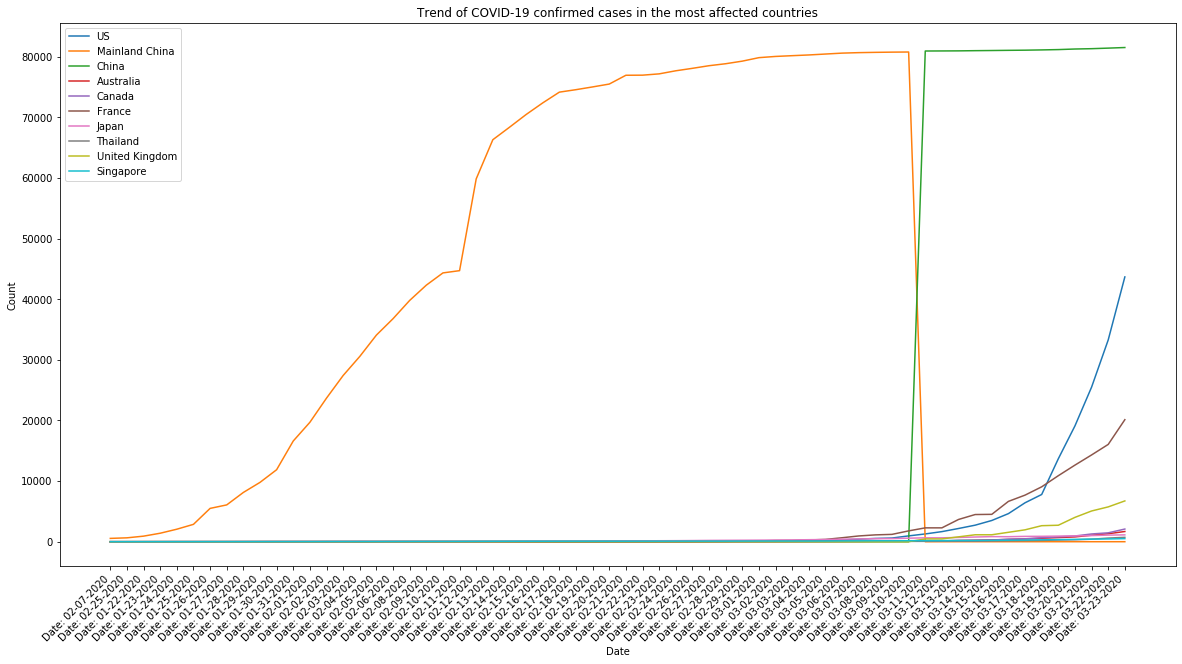

In [416]:
ax = plt.figure(figsize=(20,10))

# Add title
ax = plt.title("Trend of COVID-19 confirmed cases in the most affected countries")

for i in top_ten:
    ax = sns.lineplot(y = trend_df[i], x = trend_df['Date'], label = i)

ax.legend()



# ax = sns.color_palette("RdBu", n_colors=7)

ax.set_xticklabels(labels=trend_df['Date'], rotation=45, ha='right')


ax = plt.ylabel("Count")

Gosh that spike of Mainland China, Let's verify

In [415]:
old_sample_file = pd.read_csv("./02-19-2020.csv")
old_sample_file.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-19T23:23:02,62031,2029,10337
1,Guangdong,Mainland China,2020-02-19T10:23:02,1331,5,606
2,Henan,Mainland China,2020-02-19T12:13:08,1262,19,573
3,Zhejiang,Mainland China,2020-02-19T11:33:02,1174,0,604
4,Hunan,Mainland China,2020-02-19T11:33:02,1008,4,561


Whoa

I understand this graph is really unintuitive, will try to make it more user friendly

I also created this other dictionary, it was a dead end for this task, but might be helpful later

In [419]:
def dictionary_output(sample_df, top_ten):
    new_country_list = []
    new_state_list = []
    new_confirmed_list = []
    new_death_list = []
    new_date_list = []

    top_country_dictionary = {}

    for i in top_ten:
        counter = 0
        date_list = []
        temp = []
        print("Searching for: ", i)
        for column , row in sample_df.iterrows():
            if i == row["Country"]:
    #             print("Found a match!")
    #             print("Current", row['Date'], "Confirmed cases: ", row['Confirmed'])
                if len(date_list) == 0:
                    date_list.append(row["Date"])
                    temp.append(row['Confirmed'])
                else:
                    if date_list[-1] == row["Date"]:
                        if type(row["Confirmed"]) == type(float('nan')):
                            temp[-1] += 0
                        else:
                            temp[-1]+=row["Confirmed"]
                    else:
                        date_list.append(row["Date"])
                        temp.append(row['Confirmed'])
                        
            date_dictionary = {}
        for j in range(len(date_list)):
            date_dictionary[date_list[j]] = temp[j]
        top_country_dictionary[i] = date_dictionary
    return top_country_dictionary

In [420]:
a = dictionary_output(main_df, top_ten)

Searching for:  US
Searching for:  Mainland China
Searching for:  China
Searching for:  Australia
Searching for:  Canada
Searching for:  France
Searching for:  Japan
Searching for:  Thailand
Searching for:  United Kingdom
Searching for:  Singapore
